Just a notebook for me to play around and look at possible analysis and visualizations to dive deeper into

Visuallizations for the city data

In [23]:
from os import path
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

DATA_DIR = 'Data'
FIG_DIR = 'Figures/City/'

# 0. Loading and minor preprocessing of dataset

In [24]:
#main dataset
city_dataset = pd.read_csv(path.join(DATA_DIR, 'city_dataset.csv'))
city_dataset[['supports_paris']] = city_dataset[['supports_paris']].astype(int)
city_dataset[['is_democrat']] = (city_dataset[['mayor_political_party']] == 'D').astype(int)
city_dataset.head()

,city,mayor_name,CO2_per_cap,plus_minus,conservatism,supports_paris,mayor_political_party,is_democrat
0,Columbus,Andrew Ginther,19.8,8.5,-0.26,1,D,1
1,Baltimore,Bernard Young,20.2,9.1,-0.66,1,D,1
2,New York,Bill de Blasio,17.1,5.5,-0.66,1,D,1
3,Buffalo,Byron Brown,19.8,10.0,-0.66,1,D,1
4,Las Vegas,Carolyn Goodman,12.3,4.8,-0.03,0,I,0


In [25]:
#standardized dataset (for z scores)

city_dataset['is_democrat'] = city_dataset['mayor_political_party'].astype('bool')
city_dataset['supports_paris'] = city_dataset['supports_paris'].astype('bool')
city_z = city_dataset.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
city_z['is_democrat'] = city_dataset['is_democrat']
city_z['supports_paris'] = city_dataset['supports_paris']
city_z['is_democrat'] = city_z['is_democrat'].astype('int')
city_z['supports_paris'] = city_z['supports_paris'].astype('int')
city_z.head()

,CO2_per_cap,plus_minus,conservatism,is_democrat,supports_paris
0,0.337421,0.472098,0.212022,1,1
1,0.456781,0.717998,-1.144919,1,1
2,-0.468258,-0.757405,-1.144919,1,1
3,0.337421,1.086849,-1.144919,1,1
4,-1.900578,-1.044289,0.992263,1,0


In [26]:
city_dataset.describe()

,CO2_per_cap,plus_minus,conservatism
count,52.000000,52.000000,52.000000
mean,18.669231,7.348077,-0.322500
std,3.383903,2.463816,0.297657
min,12.300000,3.200000,-0.930000
25%,15.975000,5.100000,-0.520000
50%,18.850000,7.450000,-0.305000
75%,20.875000,9.000000,-0.092500
max,26.100000,13.500000,0.260000


In [27]:
# get medians

city_dataset['supports_paris'].median()

1.0

# 1. CO2 Model

## 1.1 Full linear model

In [28]:
model = smf.ols(formula='CO2_per_cap ~ conservatism + is_democrat', data=city_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 20 May 2022   Prob (F-statistic):             0.0896
Time:                        17:11:49   Log-Likelihood:                -135.16
No. Observations:                  52   AIC:                             274.3
Df Residuals:                      50   BIC:                             278.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.8986    

In [29]:
#standardized model
model = smf.ols(formula='CO2_per_cap ~ conservatism + is_democrat', data=city_z)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 20 May 2022   Prob (F-statistic):             0.0896
Time:                        17:11:49   Log-Likelihood:                -72.271
No. Observations:                  52   AIC:                             148.5
Df Residuals:                      50   BIC:                             152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.627e-16      0.069   9.65e-15   

## 1.2 CO2 per cap and conservatism

In [30]:
model1 = smf.ols(formula='CO2_per_cap ~ conservatism', data=city_dataset)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 20 May 2022   Prob (F-statistic):             0.0896
Time:                        17:11:50   Log-Likelihood:                -135.16
No. Observations:                  52   AIC:                             274.3
Df Residuals:                      50   BIC:                             278.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.7973      0.682     26.084   

In [31]:
#Standardized
model1 = smf.ols(formula='CO2_per_cap ~ conservatism', data=city_z)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 20 May 2022   Prob (F-statistic):             0.0896
Time:                        17:11:50   Log-Likelihood:                -72.271
No. Observations:                  52   AIC:                             148.5
Df Residuals:                      50   BIC:                             152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.329e-15      0.137   9.67e-15   

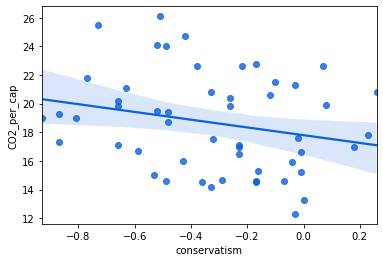

In [32]:
sns.regplot(y = 'CO2_per_cap', x = 'conservatism', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_conservatism.png')

## 1.3 CO2 per cap and supports paris

In [33]:
model2 = smf.ols(formula='CO2_per_cap ~ supports_paris', data=city_dataset)
results2 = model2.fit()
print(results2.summary2())

                   Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.004   
Dependent Variable:    CO2_per_cap       AIC:                 276.1109
Date:                  2022-05-20 17:11  BIC:                 280.0134
No. Observations:      52                Log-Likelihood:      -136.06 
Df Model:              1                 F-statistic:         1.195   
Df Residuals:          50                Prob (F-statistic):  0.280   
R-squared:             0.023             Scale:               11.407  
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept              17.6200   1.0680 16.4974 0.0000 15.4748 19.7652
supports_paris[T.True]  1.2990   1.1884  1.0931 0.2796 -1.0879  3.6860
----------------------------------------------------------------------
Omnibus:                 4

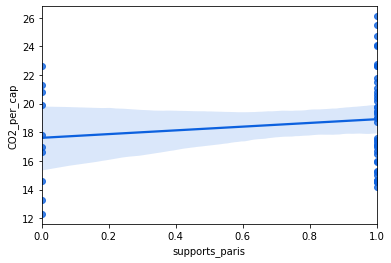

In [34]:
sns.regplot(y = 'CO2_per_cap', x = 'supports_paris', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_supportparis.png')

## 1.4. CO2 per cap and is_democrat

In [35]:
model3 = smf.ols(formula='CO2_per_cap ~ is_democrat', data=city_dataset)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 May 2022   Prob (F-statistic):                nan
Time:                        17:11:51   Log-Likelihood:                -136.67
No. Observations:                  52   AIC:                             275.3
Df Residuals:                      51   BIC:                             277.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.3346    

In [36]:
#standardized
model3 = smf.ols(formula='CO2_per_cap ~ is_democrat', data=city_z)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 May 2022   Prob (F-statistic):                nan
Time:                        17:11:51   Log-Likelihood:                -73.785
No. Observations:                  52   AIC:                             149.6
Df Residuals:                      51   BIC:                             151.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.713e-16      0.070   9.59e-15      

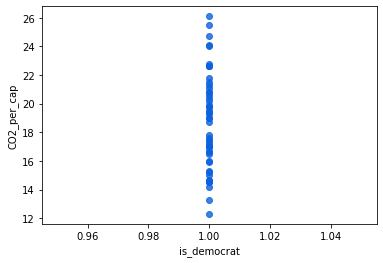

In [37]:
sns.regplot(y = 'CO2_per_cap', x = 'is_democrat', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_democrat.png')

# 2. Supports Paris Model

## 2.1. Full model

### 2.1a: linear

In [38]:
model7 = smf.ols(formula='supports_paris ~ is_democrat + conservatism', data=city_dataset)
results7 = model7.fit()
print(results7.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (52, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

### 2.1b: Logistic

## 2.2. Supports Paris and conservatism

### 2.2a: linear

In [39]:
model5 = smf.ols(formula='supports_paris ~ conservatism', data=city_dataset)
results5 = model5.fit()
results5.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (52, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

<AxesSubplot:xlabel='conservatism', ylabel='supports_paris'>

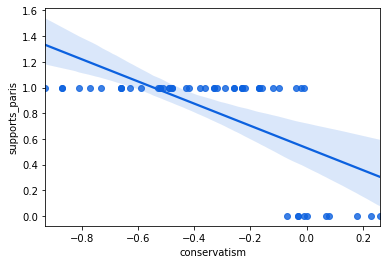

In [40]:
sns.regplot(y = 'supports_paris', x = 'conservatism', data = city_dataset)

### 2.2b: logistic

In [41]:
# defining the dependent and independent variables
X = city_dataset[['conservatism']]
y = city_dataset[['supports_paris']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit(method = 'bfgs')

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.144526
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
                           Logit Regression Results                           
Dep. Variable:         supports_paris   No. Observations:                   52
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.7048
Time:                        17:11:57   Log-Likelihood:                -7.5153
converged:                       True   LL-Null:                       -25.457
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
conservatism   -21.5132      9.183

In [42]:
#get odds ratio
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                        5%       95%    Odds Ratio
conservatism  6.929649e-18  0.029727  4.538681e-10


In [43]:
#standardized

#model

# defining the dependent and independent variables
X = city_z[['conservatism']]
y = city_z[['supports_paris']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit(method = 'bfgs')

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.547441
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
                           Logit Regression Results                           
Dep. Variable:         supports_paris   No. Observations:                   52
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 -0.1182
Time:                        17:11:57   Log-Likelihood:                -28.467
converged:                       True   LL-Null:                       -25.457
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
conservatism    -1.3011      0.398   

In [44]:
#get standardized odds ratio
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                    5%       95%  Odds Ratio
conservatism  0.124684  0.594368    0.272228


/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


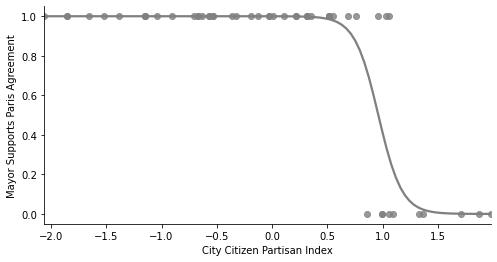

In [50]:
#plot
plt.figure(figsize = (8,4))
sns.regplot(y = y, x = X, data = city_dataset, logistic = True, color = 'grey')
sns.despine()
plt.ylabel('Mayor Supports Paris Agreement')
plt.xlabel('City Citizen Partisan Index')
plt.savefig(FIG_DIR + 'figure45.png')

## 2.3 Supports Paris and is democrat

### 2.3a: Linear

In [46]:
model6 = smf.ols(formula='supports_paris ~ is_democrat', data=city_dataset)
results6 = model6.fit()
print(results6.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (52, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
sns.regplot(y = 'supports_paris', x = 'is_democrat', data = city_dataset)
plt.savefig(FIG_DIR + 'Paris_democrat.png')

In [ ]:
#print(results6.params)

def supports_paris(party):
    """
    predicts percent chance a city supports paris based on whether their mayor is a democrat
    enter 1 for democrat, 0 for not a democrat
    """
    b0, b1 = results6.params
    return (b0 + b1*party)

democrat = supports_paris(1)
not_dem = supports_paris(0)

print(f'There is a {democrat*100} percent chance a democrat supports paris')
print(f'There is a {not_dem*100} percent chance a non-democrat supports paris')

### 2.3b: logistic

In [ ]:
city_dataset.head()

In [ ]:
#model

# defining the dependent and independent variables
X = city_dataset[['is_democrat']]
y = city_dataset[['supports_paris']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

In [ ]:
sns.regplot(y = 'supports_paris', x = 'is_democrat', data = city_dataset, logistic = True)

# 3. Viz and misc

In [ ]:
sns.regplot(data = city_dataset, x = 'is_democrat', y = 'supports_paris')

In [ ]:
sns.regplot(data = city_dataset, x = 'is_democrat', y = 'supports_paris', logistic = True)

In [ ]:
sns.regplot(data = city_dataset, x = 'conservatism', y = 'supports_paris')

In [ ]:
sns.scatterplot(data = city_dataset, x = 'conservatism', y = 'supports_paris', hue = 'mayor_political_party')

In [ ]:
plt.figure(figsize = (8,4))
colors = ["#0C61DF",'#e3dce6', "#FA3535"]
sns.set_palette(sns.color_palette(colors))
sns.swarmplot(data = city_dataset, y = 'conservatism', x = 'supports_paris', hue = 'mayor_political_party')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Mayor Supports Paris Agreement ')
plt.ylabel('City Citizen Partisan Index')
plt.legend(title = 'Mayor Political Party')
sns.despine()
plt.savefig(FIG_DIR + 'figure44.png')

In [ ]:
sns.regplot(data = city_dataset, x = 'conservatism', y = 'supports_paris', logistic = True)

In [ ]:
#conservatism squared (lower R squared, probably don't use)
model8 = smf.ols(formula='supports_paris ~ is_democrat + conservatism_sq', data=city_dataset)
results8 = model8.fit()
print(results8.summary())